In [4]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker
import matplotlib.dates as md
import datetime as dt
from scipy import stats
import math 

In [5]:
#Import data
#df5 = pd.read_csv('data/AccelerometerData_103_04_06_19.txt')  
#df6 = pd.read_csv('AccelerometerData_103_05_06_19.txt') 
df2 = pd.read_csv('data/AccelerometerData_101_31_05_19.txt')  
#df4 = pd.read_csv('AccelerometerData_102_03_06_19.txt') 
df1 = pd.read_csv('data/AccelerometerData_101_30_05_19.txt') 
#df3 = pd.read_csv('AccelerometerData_102_02_06_19.txt') 

In [6]:
df1

,UTC_Time,UpTime,Value1,Value2,Value3
0,2:20:39 AM,524,-0.583849,1.450050,9.635897
1,2:20:39 AM,541,-0.569492,1.469193,9.655040
2,2:20:39 AM,557,-0.562313,1.502693,9.652647
3,2:20:39 AM,574,-0.564706,1.521835,9.659825
4,2:20:39 AM,589,-0.569492,1.517050,9.662218
...,...,...,...,...,...
414441,7:54:57 AM,20058353,-3.337988,2.242075,9.075976
414442,7:54:57 AM,20058355,-3.467200,2.203790,9.253045
414443,7:54:57 AM,20058357,-3.620341,1.931008,9.236296
414444,7:54:57 AM,20058369,-3.701697,1.808974,9.126225


In [4]:
# data seperation for each participant and create a list for all datasets
Participant1=[df1,df2]
Participant2=[df3,df4]
Participant3=[df5,df6]
Participants=[Participant1,Participant2,Participant3]
df=[df1,df2,df3,df4,df5,df6]

In [5]:
df[0].head()

,UTC_Time,UpTime,Value1,Value2,Value3
0,2:20:39 AM,524,-0.583849,1.450050,9.635897
1,2:20:39 AM,541,-0.569492,1.469193,9.655040
2,2:20:39 AM,557,-0.562313,1.502693,9.652647
3,2:20:39 AM,574,-0.564706,1.521835,9.659825
4,2:20:39 AM,589,-0.569492,1.517050,9.662218


In [6]:
df=df[0]

# Summary Statistics

In [7]:
print('Earliest date:',df.UTC_Time.min())
print('Latest date:',df.UTC_Time.max())
print('Min of ax:',df.Value1.min())
print('Min of ay:',df.Value2.min())
print('Min of az:',df.Value3.min())
print('Max of ax:',df.Value1.max())
print('Max of ay:',df.Value2.max())
print('Max of az:',df.Value3.max())

Earliest date: 2:20:39 AM
Latest date: 7:54:57 AM
Min of ax: -20.970697
Min of ay: -26.82115
Min of az: -14.13201
Max of ax: 18.151953
Max of ay: 30.592237
Max of az: 20.484955


In [8]:
print('Mean value of ax for all users:%i'%np.mean(df.Value1))
print('Mean value of ay for all users:%i'%np.mean(df.Value2))
print('Mean value of az for all users:%i'%np.mean(df.Value3))

Mean value of ax for all users:0
Mean value of ay for all users:-2
Mean value of az for all users:6


# Distribution Analysis of Values

In [9]:
from distfit import distfit

In [ ]:
dist = distfit()
dist.fit_transform(df['Value1'] )
dist.plot(figsize=(10,5));

In [ ]:
dist = distfit()
dist.fit_transform(df['Value2'] )
dist.plot(figsize=(10,5));

In [ ]:
dist = distfit()
dist.fit_transform(df['Value3'] )
dist.plot(figsize=(10,5));

# Preprocessing

In [10]:
# Remove spikes 
df = df[(np.abs(stats.zscore(df.iloc[:,2:5])) < 3).all(axis=1)]

In [11]:
#Convert UpTime to timedelta(ms)
df['UpTime'] = pd.to_timedelta(df['UpTime'], 'ms')

In [12]:
#Resample data in 20Hz
df=df.resample('50ms', on='UpTime').mean()
df = df.fillna(method = 'ffill')

In [13]:
# Rolling 5 sec medians value1,2,3
df['Value1']=df['Value1'].rolling(window=100,min_periods=1).median()
df['Value2']=df['Value2'].rolling(window=100,min_periods=1).median()
df['Value3']=df['Value3'].rolling(window=100,min_periods=1).median()

In [14]:
df.head()

,Value1,Value2,Value3
UpTime,,,
0 days 00:00:00.524000,-0.571885,1.473979,9.647861
0 days 00:00:00.574000,-0.569492,1.496711,9.654441
0 days 00:00:00.624000,-0.571885,1.497907,9.653843
0 days 00:00:00.674000,-0.576072,1.508675,9.653843
0 days 00:00:00.724000,-0.580259,1.519442,9.653843


# Calculate Angle

In [15]:
#Calculate angle
df['angle'] = np.arctan(df["Value3"] / np.sqrt( np.square(df["Value1"]) + np.square(df["Value2"]))) * 180 / np.pi

In [16]:
#Statistics about angle
print('Min of angle:',df.angle.min())
print('Max of angle:',df.angle.max())
print('Mean of angle:',df.angle.mean())

Min of angle: -41.23853482865258
Max of angle: 88.78417235494518
Mean of angle: 44.078380999909896


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00906602] [loc=44.078 scale=27.793]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0123067] [loc=-41.239 scale=85.317]
[distfit] >[pareto    ] [13.2 sec] [RSS: 0.0119666] [loc=-6609591025.353 scale=6609590984.114]
[distfit] >[dweibull  ] [15.5 sec] [RSS: 0.00465406] [loc=55.513 scale=21.716]
[distfit] >[t         ] [9.36 sec] [RSS: 0.00557408] [loc=55.140 scale=8.146]
[distfit] >[genextreme] [15.2 sec] [RSS: 0.00842311] [loc=38.202 scale=28.832]
[distfit] >[gamma     ] [7.26 sec] [RSS: 0.0157828] [loc=-41.239 scale=3.193]
[distfit] >[lognorm   ] [17.9 sec] [RSS: 0.0131746] [loc=-41.239 scale=1.807]
[distfit] >[beta      ] [10.5 sec] [RSS: 0.0106457] [loc=-44.096 scale=132.881]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0107327] [loc=-41.239 scale=130.023]
[distfit] >[loggamma  ] [2.19 sec] [RSS: 0.00735408] [loc=68.204 scale=9.650]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


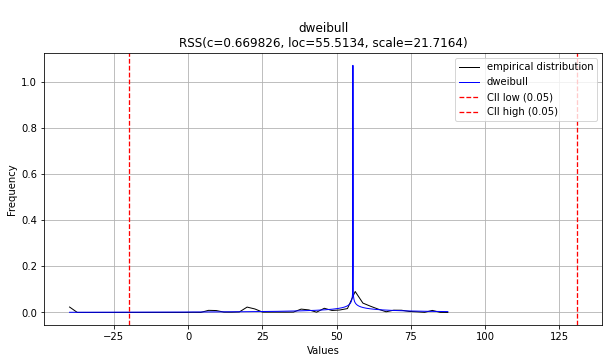

In [17]:
#Distribution of Angle
dist = distfit()
dist.fit_transform(df['angle'] )
dist.plot(figsize=(10,5));

In [18]:
# Reset UpTime
df.reset_index(inplace=True)

In [19]:
df.head()

,UpTime,Value1,Value2,Value3,angle
0,0 days 00:00:00.524000,-0.571885,1.473979,9.647861,80.693435
1,0 days 00:00:00.574000,-0.569492,1.496711,9.654441,80.582026
2,0 days 00:00:00.624000,-0.571885,1.497907,9.653843,80.570073
3,0 days 00:00:00.674000,-0.576072,1.508675,9.653843,80.503359
4,0 days 00:00:00.724000,-0.580259,1.519442,9.653843,80.436671


# Van Hess, 2015

In [20]:
#create a new dataframe with essential collumns
SPT = df[['UpTime', 'angle']]

In [21]:
#Average angle per 5S
SPT=SPT.resample('5S', on='UpTime').mean()

In [22]:
#calculate angle differences
SPT['angle difference'] = SPT['angle'].diff().fillna(method = 'bfill')

In [23]:
#Statistics about angle difference
print('Min of angle diff:',SPT['angle difference'].min())
print('Max of angle diff:',SPT['angle difference'].max())
print('Mean of angle diff:',SPT['angle difference'].mean())

Min of angle diff: -60.93557485167898
Max of angle diff: 58.75900501274952
Mean of angle diff: -0.0060304792283639675


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.103864] [loc=-0.006 scale=4.981]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.141655] [loc=-60.936 scale=60.930]
[distfit] >[pareto    ] [0.16 sec] [RSS: 0.141141] [loc=-1553478151.717 scale=1553478090.781]
[distfit] >[dweibull  ] [0.16 sec] [RSS: 0.0270991] [loc=-0.007 scale=0.103]
[distfit] >[t         ] [0.04 sec] [RSS: 0.00580752] [loc=-0.001 scale=0.010]
[distfit] >[genextreme] [0.33 sec] [RSS: 0.137093] [loc=-2.565 scale=29.998]
[distfit] >[gamma     ] [0.09 sec] [RSS: 0.105234] [loc=-130.645 scale=0.203]
[distfit] >[lognorm   ] [0.20 sec] [RSS: 0.103841] [loc=-972.400 scale=972.379]
[distfit] >[beta      ] [0.19 sec] [RSS: 0.103863] [loc=-1281.283 scale=3152.093]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.139859] [loc=-60.936 scale=119.695]
[distfit] >[loggamma  ] [0.09 sec] [RSS: 0.105033] [loc=-1676.146 scale=222.467]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


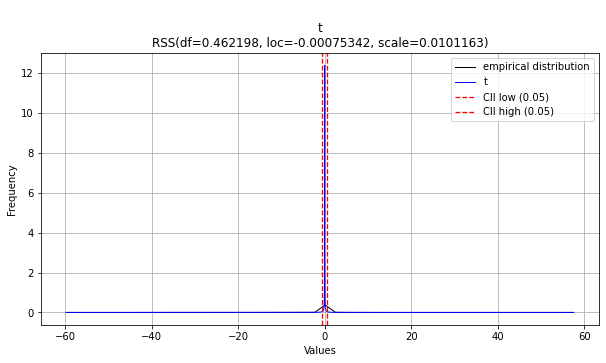

In [24]:
#Distribution of Angle
dist = distfit()
dist.fit_transform(SPT['angle difference'] )
dist.plot(figsize=(10,5));

In [ ]:
SPT.head()

# Detect inactivity

In [ ]:
#create 2 booltype columns for 5 and 10 minutes windows and detect arms changes
SPT['5MWindow'] = SPT['angle difference'].apply(lambda x: abs(x) < 5)
SPT['10MWindow'] = SPT['angle difference'].apply(lambda x: abs(x) < 5)

In [ ]:
SPT.head()

In [ ]:
#index arrays where angle change is bigger than 5 degrees    
index_5 = SPT['5MWindow'][SPT['5MWindow']==False].index
index_10 = SPT['10MWindow'][SPT['10MWindow']==False].index

In [ ]:
#Detect if someone sleeping or not  (True if time is bigger than 5 or 10 minutes)
for i in range(index_5.shape[0] - 1):
    if (index_5[i+1] - index_5[i] > dt.timedelta(seconds = 300)):
            SPT['5MWindow'].loc[index_5[i]+dt.timedelta(seconds = 5):index_5[i+1]-dt.timedelta(seconds = 5)] = True
    else:
            SPT['5MWindow'].loc[index_5[i]+dt.timedelta(seconds = 5):index_5[i+1]-dt.timedelta(seconds = 5)] = False
            

for i in range(index_10.shape[0] - 1):
    if (index_10[i+1] - index_10[i] > dt.timedelta(seconds = 600)):
            SPT['10MWindow'].loc[index_10[i]+dt.timedelta(seconds = 5):index_10[i+1]-dt.timedelta(seconds = 5)] = True
    else:
            SPT['10MWindow'].loc[index_10[i]+dt.timedelta(seconds = 5):index_10[i+1]-dt.timedelta(seconds = 5)] = False

In [ ]:
#Set upTime as an index
SPT.reset_index(inplace=True)

In [ ]:
#Replace T/F with values helps in diagrams
SPT['5MWindow']  = SPT['5MWindow'].apply(lambda x: 120 if x == 1 else  np.NaN)
SPT['10MWindow']  = SPT['10MWindow'].apply(lambda x: 140 if x == 1 else np.NaN)

In [ ]:
SPT.head(10)

# Import GroundTruth

In [ ]:
# sleep log diary as groundtrouth
ground_truth = pd.read_excel('SleepLog.xlsx')
ground_truth = ground_truth.transpose()
gt = pd.DataFrame(ground_truth.iloc[1:,:].reset_index(drop=True))
gt

# Correct time

In [ ]:
#Τime correction in appropriate form
ct=gt[0][0]
date=dt.date(2019,5,30)
ct=dt.datetime.combine(date , ct)
SPT['UpTime']= ((SPT['UpTime']) + (ct))
SPT['UpTime']= SPT['UpTime'].dt.strftime('%H:%M:%S')

In [ ]:
# Create a new collumn as ground_trouth
t1=gt[0][1]
t2= gt[0][2]
SPT.loc[(SPT['UpTime'] > str(t1)) & (SPT['UpTime'] < str(t2)) , 'gt']= 100

In [ ]:
SPT.tail()

In [ ]:
SPT.head()

# Diagrams of arm angle during sleeping period

In [ ]:
#Set UpTime as an index
SPT = SPT.set_index('UpTime')

In [ ]:
#diagram1-UpTimevsangle difference
ax = SPT.drop(['angle'], axis = 1).plot(figsize = (30,12))
ax.axhline(5, linestyle='--', color='r', label='5 degree change')
ax.axhline(-5, linestyle='--', color='r')
ax.legend()

In [ ]:
#diagram2-UpTimevsangle
ax = SPT.drop(['angle difference'], axis = 1).plot(figsize = (30,12))
ax.axhline(0, linestyle='--', color='black')
ax.legend()

# Results

In [ ]:
#SPT.reset_index(inplace=True)

In [ ]:
results_5 = SPT['5MWindow'].fillna(0)[SPT['5MWindow'].fillna(0).diff() != 0.0].astype(bool)
results_10 = SPT['10MWindow'].fillna(0)[SPT['10MWindow'].fillna(0).diff() != 0.0].astype(bool)
results_gt = SPT['gt'].fillna(0)[SPT['gt'].fillna(0).diff() != 0.0].astype(bool)


In [ ]:
#create lists with sleep intervals
result5_list = []
for i in range(results_5.shape[0] - 1):
    result5_list.append(["{} - {}".format(str(results_5.index[i]), str(results_5.index[i+1])), results_5[i]])

    result10_list = []
for i in range(results_10.shape[0] - 1):
    result10_list.append(["{} - {}".format(str(results_10.index[i]), str(results_10.index[i+1])), results_10[i]])

    resultgt_list = []
for i in range(results_gt.shape[0] - 1):
        resultgt_list.append(["{} - {}".format(str(results_gt.index[i]), str(results_gt.index[i+1])), results_gt[i]])

In [ ]:
#create dataframes with lists
results5_df  = pd.DataFrame(result5_list)
results10_df  = pd.DataFrame(result10_list)
resultsgt_df  = pd.DataFrame(resultgt_list)

In [ ]:
#Create dataframes with 2 collums
results5_df.columns = ['Time', 'Sleep']
results10_df.columns = ['Time', 'Sleep']
resultsgt_df.columns = ['Time', 'Sleep']

In [ ]:
#Sleeping or not?
results5_df  = results5_df[results5_df['Sleep'] == True]['Time']
results10_df  = results10_df[results10_df['Sleep'] == True]['Time']
resultsgt_df  = resultsgt_df[resultsgt_df['Sleep'] == True]['Time']

In [ ]:
#Combine all results in one dataframe
SPT_results = pd.concat([results5_df,results10_df, resultsgt_df], ignore_index=True, axis=1)
SPT_results.columns = ['5 minutes window', '10 minutes window', 'ground truth']
SPT_results = SPT_results.fillna('-').reset_index(drop= True)
SPT_results.index.name = 'Time Intervals'

In [ ]:
SPT_results

# Metric Score (M)

In [ ]:
#Metric based on distance
SPT['5MWindow']=SPT['5MWindow'].fillna(0)
SPT['10MWindow']=SPT['10MWindow'].fillna(0)
SPT['gt'] = SPT['gt'].fillna(0)
dist5= (SPT['5MWindow'] - SPT['gt']).abs()
dist10= (SPT['10MWindow'] - SPT['gt']).abs()

In [ ]:
#true values=(20,0)
#false values=(120,100)
dist5.value_counts()

In [ ]:
#true values=(40,0)
#false values=(140,100)
dist10.value_counts()

In [ ]:
#Count the false values
False_values5=(dist5.values==100).sum() + (dist5.values==120).sum()
False_values10=(dist10.values==140).sum() + (dist10.values==100).sum()

In [ ]:
#Calculate errors (false_values/5S divided by all values/5S)
M5=(False_values5/SPT.shape[0])*100
M10=(False_values10/SPT.shape[0])*100
print(M5,M10)